In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('data/imiona.xlsx')
df

,Rok,Imie,Liczba,Plec
0,2000,JAKUB,14497,M
1,2000,MATEUSZ,11454,M
2,2000,KACPER,8898,M
3,2000,MICHAŁ,8498,M
4,2000,PATRYK,7743,M
...,...,...,...,...
16412,2017,TINA,5,K
16413,2017,VANESA,5,K
16414,2017,VERONIKA,5,K
16415,2017,WIERA,5,K


### Zadanie 1

##### Korzystając ze zbioru danych imiona z poprzednich zajęć wykonaj wykres zliczający (Seaborn countplot z przykładu w notebooku) liczbę narodzonych dzieci w latach 2010 - 2015 z podziałem na płeć.

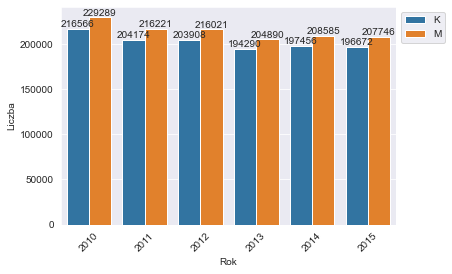

In [5]:
narodzenia = df[df['Rok'] >= 2010]
narodzenia = narodzenia[narodzenia['Rok'] <= 2015]
narodzenia = narodzenia.groupby(["Plec", "Rok"]).agg({"Liczba": "sum"})
narodzenia = narodzenia.reset_index()

plt.xticks(rotation=45)
ax = sns.barplot(x='Rok', y='Liczba', hue="Plec", data=narodzenia)
plt.legend(bbox_to_anchor=(1,1))
for container in ax.containers:
    ax.bar_label(container)

### Zadanie 2

##### Wyświetl najczęściej nadawane imię męskie oraz żeńskie w zbiorze imiona.

In [6]:
k = df[df['Plec'] == 'K']
m = df[df['Plec'] == 'M']

k_sum = k.groupby('Imie').agg({'Liczba': 'sum'}).sort_values(by='Liczba', ascending=False)
m_sum = m.groupby('Imie').agg({'Liczba': 'sum'}).sort_values(by='Liczba', ascending=False)

print(k_sum.index[0])
print(m_sum.index[0])

JULIA
JAKUB


### Zadanie 3

##### Wyświetl w konsoli liczbę unikalnych imion rozpoczynających się od litery K.

In [7]:
df[df['Imie'].str[0] == 'K']['Imie'].nunique()

98